# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint


# Import API key
from api_keys import api_key

print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

a35df9f8eb23f33d2b8d7f677172d1f7


## Generate Cities List

In [81]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lat=[]
city_lng=[]


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)

# lat_lngs_copy = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])
        city_lng.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(len(cities))
print(len(city_lat))
print(len(city_lng))
print(cities[0:5])
print(city_lat[0:5])
print(city_lng[0:5])

518
518
518
['gardez', 'castro', 'dubenskiy', 'alekseyevka', 'kruisfontein']
[33.420496430707104, -42.92911722694919, 51.37555612326804, 51.108434190573576, -71.94814477218046]
[69.08621340040563, -94.30244722368282, 56.808936020526545, 70.16272503797819, 27.711112569679386]


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [82]:
# test with Paris
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="
sample="London"

sample_url = query_url+sample
sample_url

'http://api.openweathermap.org/data/2.5/weather?appid=a35df9f8eb23f33d2b8d7f677172d1f7&units=metric&q=London'

In [83]:
test=requests.get(sample_url).json()
pprint(test)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1569966493,
 'id': 2643743,
 'main': {'humidity': 87,
          'pressure': 1005,
          'temp': 10.9,
          'temp_max': 13.33,
          'temp_min': 9.44},
 'name': 'London',
 'rain': {'1h': 0.25},
 'sys': {'country': 'GB',
         'id': 1414,
         'message': 0.0109,
         'sunrise': 1569909623,
         'sunset': 1569951606,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'speed': 4.1}}


In [84]:
# get the below info for test object
# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

temperature = test["main"]["temp_max"]
humidity=test["main"]["humidity"]
cloudiness=test["clouds"]["all"]
wind=test["wind"]["speed"]
print(temperature,humidity,cloudiness,wind)

13.33 87 75 4.1


In [85]:
# set up empty lists
tem = []
hum = []
cld = []
wnd = []

# for loop for all the 547 cities 

print("Begin Data Retrieval")
print("----------------------------")

for index,city in enumerate(cities):
    response = requests.get(query_url + city).json()
    try:
        tem.append(response['main']['temp_max'])
        hum.append(response["main"]["humidity"])
        cld.append(response["clouds"]["all"])
        wnd.append(response["wind"]["speed"])
        print(f"Processing Record {index} | {city}")
    except KeyError:
        print("City Not Found")
        tem.append(np.NaN)
        hum.append(np.NaN)
        cld.append(np.NaN)
        wnd.append(np.NaN)
    
# print(len(tem))
# # print(hum)
# # print(cld)
# # print(wnd)
# print(len(cities))

Begin Data Retrieval
----------------------------
Processing Record 0 | gardez
Processing Record 1 | castro
City Not Found
Processing Record 3 | alekseyevka
Processing Record 4 | kruisfontein
Processing Record 5 | saint-philippe
Processing Record 6 | lasa
Processing Record 7 | mandalgovi
Processing Record 8 | albany
Processing Record 9 | lebu
Processing Record 10 | constitucion
Processing Record 11 | nikolskoye
Processing Record 12 | bambous virieux
City Not Found
Processing Record 14 | pevek
Processing Record 15 | sinnamary
Processing Record 16 | norman wells
Processing Record 17 | cabo san lucas
Processing Record 18 | carnarvon
Processing Record 19 | ulaangom
Processing Record 20 | naze
Processing Record 21 | grindavik
Processing Record 22 | ushuaia
Processing Record 23 | beloha
Processing Record 24 | puerto ayora
Processing Record 25 | yellowknife
Processing Record 26 | bredasdorp
Processing Record 27 | new norfolk
Processing Record 28 | rikitea
Processing Record 29 | afsin
Processi

Processing Record 261 | sabang
Processing Record 262 | wasilla
Processing Record 263 | dukhovnitskoye
Processing Record 264 | kununurra
Processing Record 265 | hauterive
Processing Record 266 | iralaya
Processing Record 267 | hinton
Processing Record 268 | emba
City Not Found
Processing Record 270 | pekalongan
Processing Record 271 | kaitangata
Processing Record 272 | wrzesnia
City Not Found
Processing Record 274 | esperance
Processing Record 275 | madang
Processing Record 276 | terra santa
Processing Record 277 | lompoc
Processing Record 278 | cherskiy
Processing Record 279 | honiara
Processing Record 280 | paamiut
Processing Record 281 | lazaro cardenas
Processing Record 282 | vallenar
Processing Record 283 | dwarka
Processing Record 284 | arraial do cabo
Processing Record 285 | sibu
Processing Record 286 | uvalde
City Not Found
Processing Record 288 | udachnyy
Processing Record 289 | labuhan
Processing Record 290 | guerrero negro
Processing Record 291 | masuda
Processing Record 292 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
df=pd.DataFrame({
    "City":cities,
    "Temperature":tem,
    "Humidity":hum,
    "Cloudiness":cld,
    "Wind":wnd,
    "lat":city_lat,
    "lng":city_lng
})

df.head()

,City,Temperature,Humidity,Cloudiness,Wind,lat,lng
0,gardez,13.16,43.0,1.0,1.52,33.420496,69.086213
1,castro,7.00,75.0,0.0,1.00,-42.929117,-94.302447
2,dubenskiy,NaN,NaN,NaN,NaN,51.375556,56.808936
3,alekseyevka,12.00,71.0,40.0,5.00,51.108434,70.162725
4,kruisfontein,11.56,93.0,0.0,2.53,-71.948145,27.711113


In [87]:
df.to_csv("city_weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [88]:
# drop NULL

df2=df.dropna(how="any")

print(df.shape)
print(df2.shape)

(518, 7)
(459, 7)


#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Max Temperature')

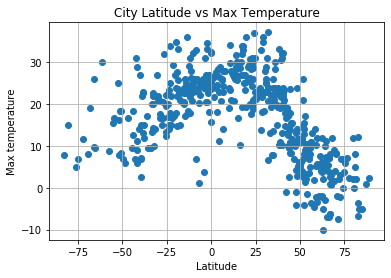

In [89]:
plt.scatter(df2["lat"],df2["Temperature"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max temperature")
plt.title("City Latitude vs Max Temperature")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs Humidity')

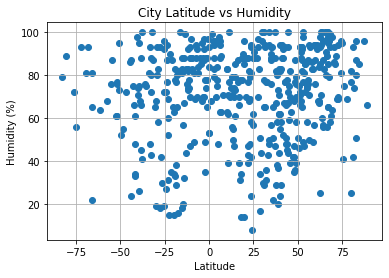

In [90]:
plt.scatter(df2["lat"],df2["Humidity"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs Cloudiness')

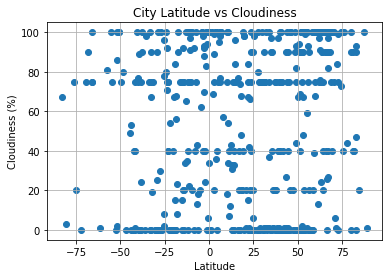

In [91]:
plt.scatter(df2["lat"],df2["Cloudiness"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs Wind speed')

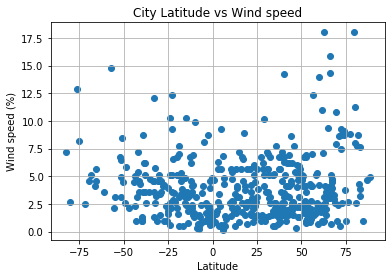

In [92]:
plt.scatter(df2["lat"],df2["Wind"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind speed (%)")
plt.title("City Latitude vs Wind speed")